Komoditas Kakao 2017 Fixed

In [32]:
# import lib
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# read the dataset
df = pd.read_excel("./datamaster.xlsx", sheet_name="2017")
# Show dataset
df

,No,Provinsi,Luas_Areal_2017,Produktiv_2017,Produksi_2017,Jumlah_Petani,Areal_Perkebunan_Rakyat,Areal_Perkebunan_Pemerintah,Areal_Perkebunan_Swasta,Tanaman_Imature,Tanaman_Mature,Tanaman_Damage
0,1.0,Aceh,1.012026e+05,736.507656,27129.000000,129408.0,1.012030e+05,NaN,NaN,32869.0,36835.0,31499.0
1,2.0,Sumatera Utara,6.085355e+04,1085.375030,24318.810000,81661.0,5.800700e+04,270.0,2576.0,13165.0,22406.0,25283.0
2,3.0,Sumatera Barat,1.325570e+05,842.907064,46052.220101,106990.0,1.305080e+05,NaN,2049.0,47005.0,54635.0,30867.0
3,4.0,Riau,6.534920e+03,613.207763,2316.274031,14033.0,4.574000e+03,NaN,1961.0,1611.0,3777.0,1146.0
4,5.0,Kepulauan Riau,3.768892e+01,171.428571,0.889529,204.0,3.768892e+01,NaN,NaN,30.0,5.0,3.0
5,6.0,Jambi,2.439000e+03,584.974471,594.501903,5725.0,2.439000e+03,NaN,NaN,809.0,1016.0,614.0
6,7.0,Sumatera Selatan,1.071659e+04,755.093292,3042.189291,12875.0,1.071659e+04,NaN,NaN,4860.0,4029.0,1828.0
7,8.0,Kepulauan Bangka Belitung,7.641530e+02,583.900173,177.395429,1220.0,7.641530e+02,NaN,NaN,288.0,304.0,173.0
8,9.0,Bengkulu,9.448840e+03,564.459010,3166.238562,12221.0,9.448840e+03,NaN,NaN,1425.0,5609.0,2415.0
9,10.0,Lampung,7.249500e+04,871.249123,34856.837261,115285.0,7.206300e+04,NaN,432.0,11968.0,40008.0,20525.0


Data Selection

In [34]:
#  Drop data line 10 and 34 = 10 jakarta yang tidak memiliki komoditas kakao, 34 Indonesia bukan provinsi
df = df.drop([10, 34])
# buang kolom 'No', 'Provinsi', 'Areal_Perkebunan_Rakyat','Areal_Perkebunan_Pemerintah', 'Areal_Perkebunan_Swasta' karena tidak relevan dengan analisis
df = df.drop(['No', 'Provinsi'], axis=1)
# Show dataset
df

,Luas_Areal_2017,Produktiv_2017,Produksi_2017,Jumlah_Petani,Areal_Perkebunan_Rakyat,Areal_Perkebunan_Pemerintah,Areal_Perkebunan_Swasta,Tanaman_Imature,Tanaman_Mature,Tanaman_Damage
0,101202.560000,736.507656,27129.000000,129408.0,101203.000000,NaN,NaN,32869.0,36835.0,31499.0
1,60853.547489,1085.375030,24318.810000,81661.0,58007.000000,270.0,2576.0,13165.0,22406.0,25283.0
2,132557.000000,842.907064,46052.220101,106990.0,130508.000000,NaN,2049.0,47005.0,54635.0,30867.0
3,6534.920000,613.207763,2316.274031,14033.0,4574.000000,NaN,1961.0,1611.0,3777.0,1146.0
4,37.688919,171.428571,0.889529,204.0,37.688919,NaN,NaN,30.0,5.0,3.0
5,2439.000000,584.974471,594.501903,5725.0,2439.000000,NaN,NaN,809.0,1016.0,614.0
6,10716.590000,755.093292,3042.189291,12875.0,10716.590000,NaN,NaN,4860.0,4029.0,1828.0
7,764.153000,583.900173,177.395429,1220.0,764.153000,NaN,NaN,288.0,304.0,173.0
8,9448.840000,564.459010,3166.238562,12221.0,9448.840000,NaN,NaN,1425.0,5609.0,2415.0
9,72495.000000,871.249123,34856.837261,115285.0,72063.000000,NaN,432.0,11968.0,40008.0,20525.0


Preprocessing Data

a.) Data Cleaning

b.) Data Transformation

In [35]:
# Data Cleaning

df = df.fillna(df.mean()) # Nilai missing value diisi dengan rata-rata
# df = df.fillna(df.min()) # Nilai missing value diisi dengan nilai minimum
# df = df.fillna(df.max()) # Nilai missing value diisi dengan nilai maximum
# df = df.dropna() # Drop baris yang masih ada missing value

df

,Luas_Areal_2017,Produktiv_2017,Produksi_2017,Jumlah_Petani,Areal_Perkebunan_Rakyat,Areal_Perkebunan_Pemerintah,Areal_Perkebunan_Swasta,Tanaman_Imature,Tanaman_Mature,Tanaman_Damage
0,101202.560000,736.507656,27129.000000,129408.0,101203.000000,2134.714286,1965.857143,32869.0,36835.0,31499.0
1,60853.547489,1085.375030,24318.810000,81661.0,58007.000000,270.000000,2576.000000,13165.0,22406.0,25283.0
2,132557.000000,842.907064,46052.220101,106990.0,130508.000000,2134.714286,2049.000000,47005.0,54635.0,30867.0
3,6534.920000,613.207763,2316.274031,14033.0,4574.000000,2134.714286,1961.000000,1611.0,3777.0,1146.0
4,37.688919,171.428571,0.889529,204.0,37.688919,2134.714286,1965.857143,30.0,5.0,3.0
5,2439.000000,584.974471,594.501903,5725.0,2439.000000,2134.714286,1965.857143,809.0,1016.0,614.0
6,10716.590000,755.093292,3042.189291,12875.0,10716.590000,2134.714286,1965.857143,4860.0,4029.0,1828.0
7,764.153000,583.900173,177.395429,1220.0,764.153000,2134.714286,1965.857143,288.0,304.0,173.0
8,9448.840000,564.459010,3166.238562,12221.0,9448.840000,2134.714286,1965.857143,1425.0,5609.0,2415.0
9,72495.000000,871.249123,34856.837261,115285.0,72063.000000,2134.714286,432.000000,11968.0,40008.0,20525.0


In [36]:
# Data Transformation

df = df.astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 33
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Luas_Areal_2017              33 non-null     int64
 1   Produktiv_2017               33 non-null     int64
 2   Produksi_2017                33 non-null     int64
 3   Jumlah_Petani                33 non-null     int64
 4   Areal_Perkebunan_Rakyat      33 non-null     int64
 5   Areal_Perkebunan_Pemerintah  33 non-null     int64
 6   Areal_Perkebunan_Swasta      33 non-null     int64
 7   Tanaman_Imature              33 non-null     int64
 8   Tanaman_Mature               33 non-null     int64
 9   Tanaman_Damage               33 non-null     int64
dtypes: int64(10)
memory usage: 2.8 KB


In [37]:
# Final dataset siap diolah menggunakan algoritma KMeans
df

,Luas_Areal_2017,Produktiv_2017,Produksi_2017,Jumlah_Petani,Areal_Perkebunan_Rakyat,Areal_Perkebunan_Pemerintah,Areal_Perkebunan_Swasta,Tanaman_Imature,Tanaman_Mature,Tanaman_Damage
0,101202,736,27129,129408,101203,2134,1965,32869,36835,31499
1,60853,1085,24318,81661,58007,270,2576,13165,22406,25283
2,132557,842,46052,106990,130508,2134,2049,47005,54635,30867
3,6534,613,2316,14033,4574,2134,1961,1611,3777,1146
4,37,171,0,204,37,2134,1965,30,5,3
5,2439,584,594,5725,2439,2134,1965,809,1016,614
6,10716,755,3042,12875,10716,2134,1965,4860,4029,1828
7,764,583,177,1220,764,2134,1965,288,304,173
8,9448,564,3166,12221,9448,2134,1965,1425,5609,2415
9,72495,871,34856,115285,72063,2134,432,11968,40008,20525


In [38]:
# Ambil value dari dataset untuk diolah dan masukkan ke variabel x_train

x_train = df[['Luas_Areal_2017','Produktiv_2017','Produksi_2017','Jumlah_Petani', 'Areal_Perkebunan_Rakyat','Areal_Perkebunan_Pemerintah', 'Areal_Perkebunan_Swasta', 'Tanaman_Imature','Tanaman_Mature','Tanaman_Damage']].values
x_train

array([[101202,    736,  27129, 129408, 101203,   2134,   1965,  32869,
         36835,  31499],
       [ 60853,   1085,  24318,  81661,  58007,    270,   2576,  13165,
         22406,  25283],
       [132557,    842,  46052, 106990, 130508,   2134,   2049,  47005,
         54635,  30867],
       [  6534,    613,   2316,  14033,   4574,   2134,   1961,   1611,
          3777,   1146],
       [    37,    171,      0,    204,     37,   2134,   1965,     30,
             5,      3],
       [  2439,    584,    594,   5725,   2439,   2134,   1965,    809,
          1016,    614],
       [ 10716,    755,   3042,  12875,  10716,   2134,   1965,   4860,
          4029,   1828],
       [   764,    583,    177,   1220,    764,   2134,   1965,    288,
           304,    173],
       [  9448,    564,   3166,  12221,   9448,   2134,   1965,   1425,
          5609,   2415],
       [ 72495,    871,  34856, 115285,  72063,   2134,    432,  11968,
         40008,  20525],
       [  8477,    840,   3994

Data Transformation

In [39]:
# Normalisasi data agar semua kolom memiliki range nilai yang sama tidak jomplang yang akan mempengaruhi hasil clustering
#  Standar Scaler adalah salah satu metode normalisasi data yang paling sering digunakan untuk mengubah data menjadi distribusi normal dengan mean = 0 dan standard deviation = 1
# (x - mean(x)) / std(x) = (x - u) / s  (u = mean(x), s = std(x)) 
# (x = nilai data, mean(x) = rata-rata, std(x) = standar deviasi)  (u = nilai rata-rata, s = nilai standar deviasi)
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(df)
# df_scaled

# MinMaxScaler adalah salah satu metode normalisasi data yang paling sering digunakan untuk mengubah data menjadi distribusi normal dengan nilai minimum = 0 dan nilai maksimum = 1
# (x - min(x)) / (max(x) - min(x)) = (x - a) / (b - a)  (a = min(x), b = max(x))
# (x = nilai data, min(x) = nilai minimum, max(x) = nilai maksimum)  (a = nilai minimum, b = nilai maksimum)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(x_train)
df_scaled

# Perbedaan antara Standard Scaler dan MinMax Scaler adalah Standard Scaler mengubah data menjadi distribusi normal dengan mean = 0 dan standard deviation = 1 sedangkan MinMax Scaler mengubah data menjadi distribusi normal dengan nilai minimum = 0 dan nilai maksimum = 1
# Standard Scaler lebih cocok digunakan untuk data yang memiliki distribusi normal sedangkan MinMax Scaler lebih cocok digunakan untuk data yang memiliki distribusi tidak normal contohnya data yang memiliki nilai outlier yang sangat besar atau sangat kecil sehingga mengganggu distribusi normal data tersebut sehingga perlu dilakukan normalisasi data dengan MinMax Scaler agar nilai outlier tersebut tidak terlalu mempengaruhi hasil clustering, sedangkan Standard Scaler tidak cocok digunakan untuk data yang memiliki nilai outlier yang sangat besar atau sangat kecil karena nilai outlier tersebut akan sangat mempengaruhi hasil clustering sehingga hasil clustering tidak akurat lagi.

array([[3.54033246e-01, 6.18161926e-01, 2.69698777e-01, 4.93077287e-01,
        3.54040462e-01, 1.72337460e-01, 3.92514011e-01, 6.75657881e-01,
        2.51801512e-01, 3.46566901e-01],
       [2.12829396e-01, 1.00000000e+00, 2.41753653e-01, 3.10861866e-01,
        2.02871771e-01, 1.95129950e-02, 5.14811849e-01, 2.70250808e-01,
        1.53152476e-01, 2.78169014e-01],
       [4.63762030e-01, 7.34135667e-01, 4.57818869e-01, 4.07524157e-01,
        4.56596220e-01, 1.72337460e-01, 4.09327462e-01, 9.66504125e-01,
        3.73497600e-01, 3.39612676e-01],
       [2.27366579e-02, 4.83588621e-01, 2.30241575e-02, 5.27751912e-02,
        1.58776820e-02, 1.72337460e-01, 3.91713371e-01, 3.25288562e-02,
        2.57886317e-02, 1.25770246e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.72337460e-01, 3.92514011e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [8.40594926e-03, 4.51859956e-01, 5.90515956e-03, 2.10696240e-02,
   

Data Mining using K - Means Clustering

In [40]:
# KMeans Clustering
# untuk pertama kali kita harus menentukan jumlah cluster yang akan digunakan n_clusters= ? ini bisa ditentukan secara random yang selanjutnya akan kita evaluasi dengan metode elbow method

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=30).fit(df_scaled)
kmeans.labels_ # menampilkan hasil clustering

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0])

In [41]:
# tampilkan centroid dari cluster 0
kmeans.cluster_centers_[0]

array([0.07506212, 0.51402782, 0.06975701, 0.11608724, 0.0705068 ,
       0.1723521 , 0.39181345, 0.12092287, 0.06403475, 0.068313  ])

In [42]:
# Menambahkan kolom cluster ke dalam dataset
df['cluster'] = kmeans.labels_
df

,Luas_Areal_2017,Produktiv_2017,Produksi_2017,Jumlah_Petani,Areal_Perkebunan_Rakyat,Areal_Perkebunan_Pemerintah,Areal_Perkebunan_Swasta,Tanaman_Imature,Tanaman_Mature,Tanaman_Damage,cluster
0,101202,736,27129,129408,101203,2134,1965,32869,36835,31499,0
1,60853,1085,24318,81661,58007,270,2576,13165,22406,25283,0
2,132557,842,46052,106990,130508,2134,2049,47005,54635,30867,1
3,6534,613,2316,14033,4574,2134,1961,1611,3777,1146,0
4,37,171,0,204,37,2134,1965,30,5,3,0
5,2439,584,594,5725,2439,2134,1965,809,1016,614,0
6,10716,755,3042,12875,10716,2134,1965,4860,4029,1828,0
7,764,583,177,1220,764,2134,1965,288,304,173,0
8,9448,564,3166,12221,9448,2134,1965,1425,5609,2415,0
9,72495,871,34856,115285,72063,2134,432,11968,40008,20525,0


In [43]:
# Menampilkan jumlah data pada setiap cluster
df['cluster'].value_counts()

0    28
1     5
Name: cluster, dtype: int64

Evaluasi

**Davies Bouldin Index**

Indeks ini menandakan rata-rata 'similaritas' antar cluster (Intracluster), dimana kesamaan adalah ukuran yang membandingkan jarak antar cluster dengan ukuran cluster itu sendiri.

Nol adalah skor serendah mungkin. Nilai yang mendekati nol menunjukkan partisi yang baik.

In [44]:
# tingkat akurasi dari clustering k means menggunakan Davies Bouldin Index (DBI)
from sklearn.metrics import davies_bouldin_score
print("Davies Bouldin Index (DBI) =", davies_bouldin_score(df_scaled, kmeans.labels_))
davies_bouldin_score

Davies Bouldin Index (DBI) = 0.5874241384385375


<function sklearn.metrics.cluster._unsupervised.davies_bouldin_score(X, labels)>

Jelaskan tentang Elbow Method

Elbow Method adalah metode untuk menentukan jumlah cluster yang optimal. Metode ini mengasumsikan bahwa jumlah cluster yang optimal adalah titik di mana penurunan SSE (Sum of Squared Error) menjadi sangat lambat (Penurunan SSE paling drastis lalu selanjutnya diikuti dengan penurunan SSE yang stabil).

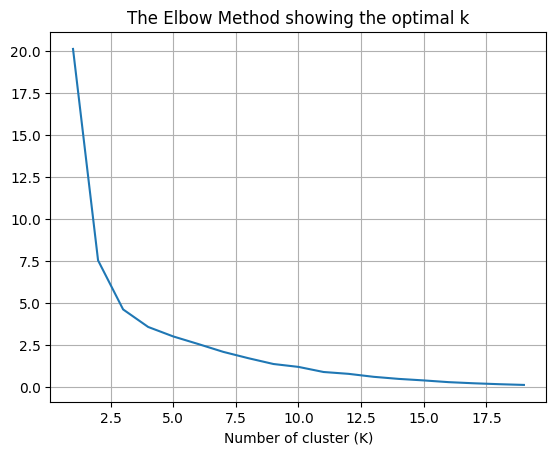

{1: 20.15132973671007,
 2: 7.557122141231177,
 3: 4.637519245562898,
 4: 3.5935975047214805,
 5: 3.029558725124887,
 6: 2.576837006261188,
 7: 2.1093296001944015,
 8: 1.7327830789220042,
 9: 1.387922859032976,
 10: 1.2150340842513296,
 11: 0.9119472136758133,
 12: 0.8015836541795835,
 13: 0.6248367537164836,
 14: 0.5008141645977762,
 15: 0.4101217385550691,
 16: 0.3065639068577018,
 17: 0.23960851317453694,
 18: 0.1854417517895843,
 19: 0.14190651990133674}

In [45]:
# Optimasi jumlah cluster menggunakan Elbow Method
# Menampilkan nilai SSE untuk setiap jumlah cluster
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_scaled)
    df["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster (K)")
plt.title('The Elbow Method showing the optimal k')
plt.grid()
plt.show()

# tampilkan seluruh nilai SSE 
sse

Visualisasi dari Knowledge yang didapat

In [46]:
df_provinsi = pd.read_excel("./datamaster.xlsx", sheet_name="2017", usecols="B")
df['Provinsi'] = df_provinsi
# drop column clusters
df.drop(columns=['clusters'], inplace=True)
df

,Luas_Areal_2017,Produktiv_2017,Produksi_2017,Jumlah_Petani,Areal_Perkebunan_Rakyat,Areal_Perkebunan_Pemerintah,Areal_Perkebunan_Swasta,Tanaman_Imature,Tanaman_Mature,Tanaman_Damage,cluster,Provinsi
0,101202,736,27129,129408,101203,2134,1965,32869,36835,31499,0,Aceh
1,60853,1085,24318,81661,58007,270,2576,13165,22406,25283,0,Sumatera Utara
2,132557,842,46052,106990,130508,2134,2049,47005,54635,30867,1,Sumatera Barat
3,6534,613,2316,14033,4574,2134,1961,1611,3777,1146,0,Riau
4,37,171,0,204,37,2134,1965,30,5,3,0,Kepulauan Riau
5,2439,584,594,5725,2439,2134,1965,809,1016,614,0,Jambi
6,10716,755,3042,12875,10716,2134,1965,4860,4029,1828,0,Sumatera Selatan
7,764,583,177,1220,764,2134,1965,288,304,173,0,Kepulauan Bangka Belitung
8,9448,564,3166,12221,9448,2134,1965,1425,5609,2415,0,Bengkulu
9,72495,871,34856,115285,72063,2134,432,11968,40008,20525,0,Lampung


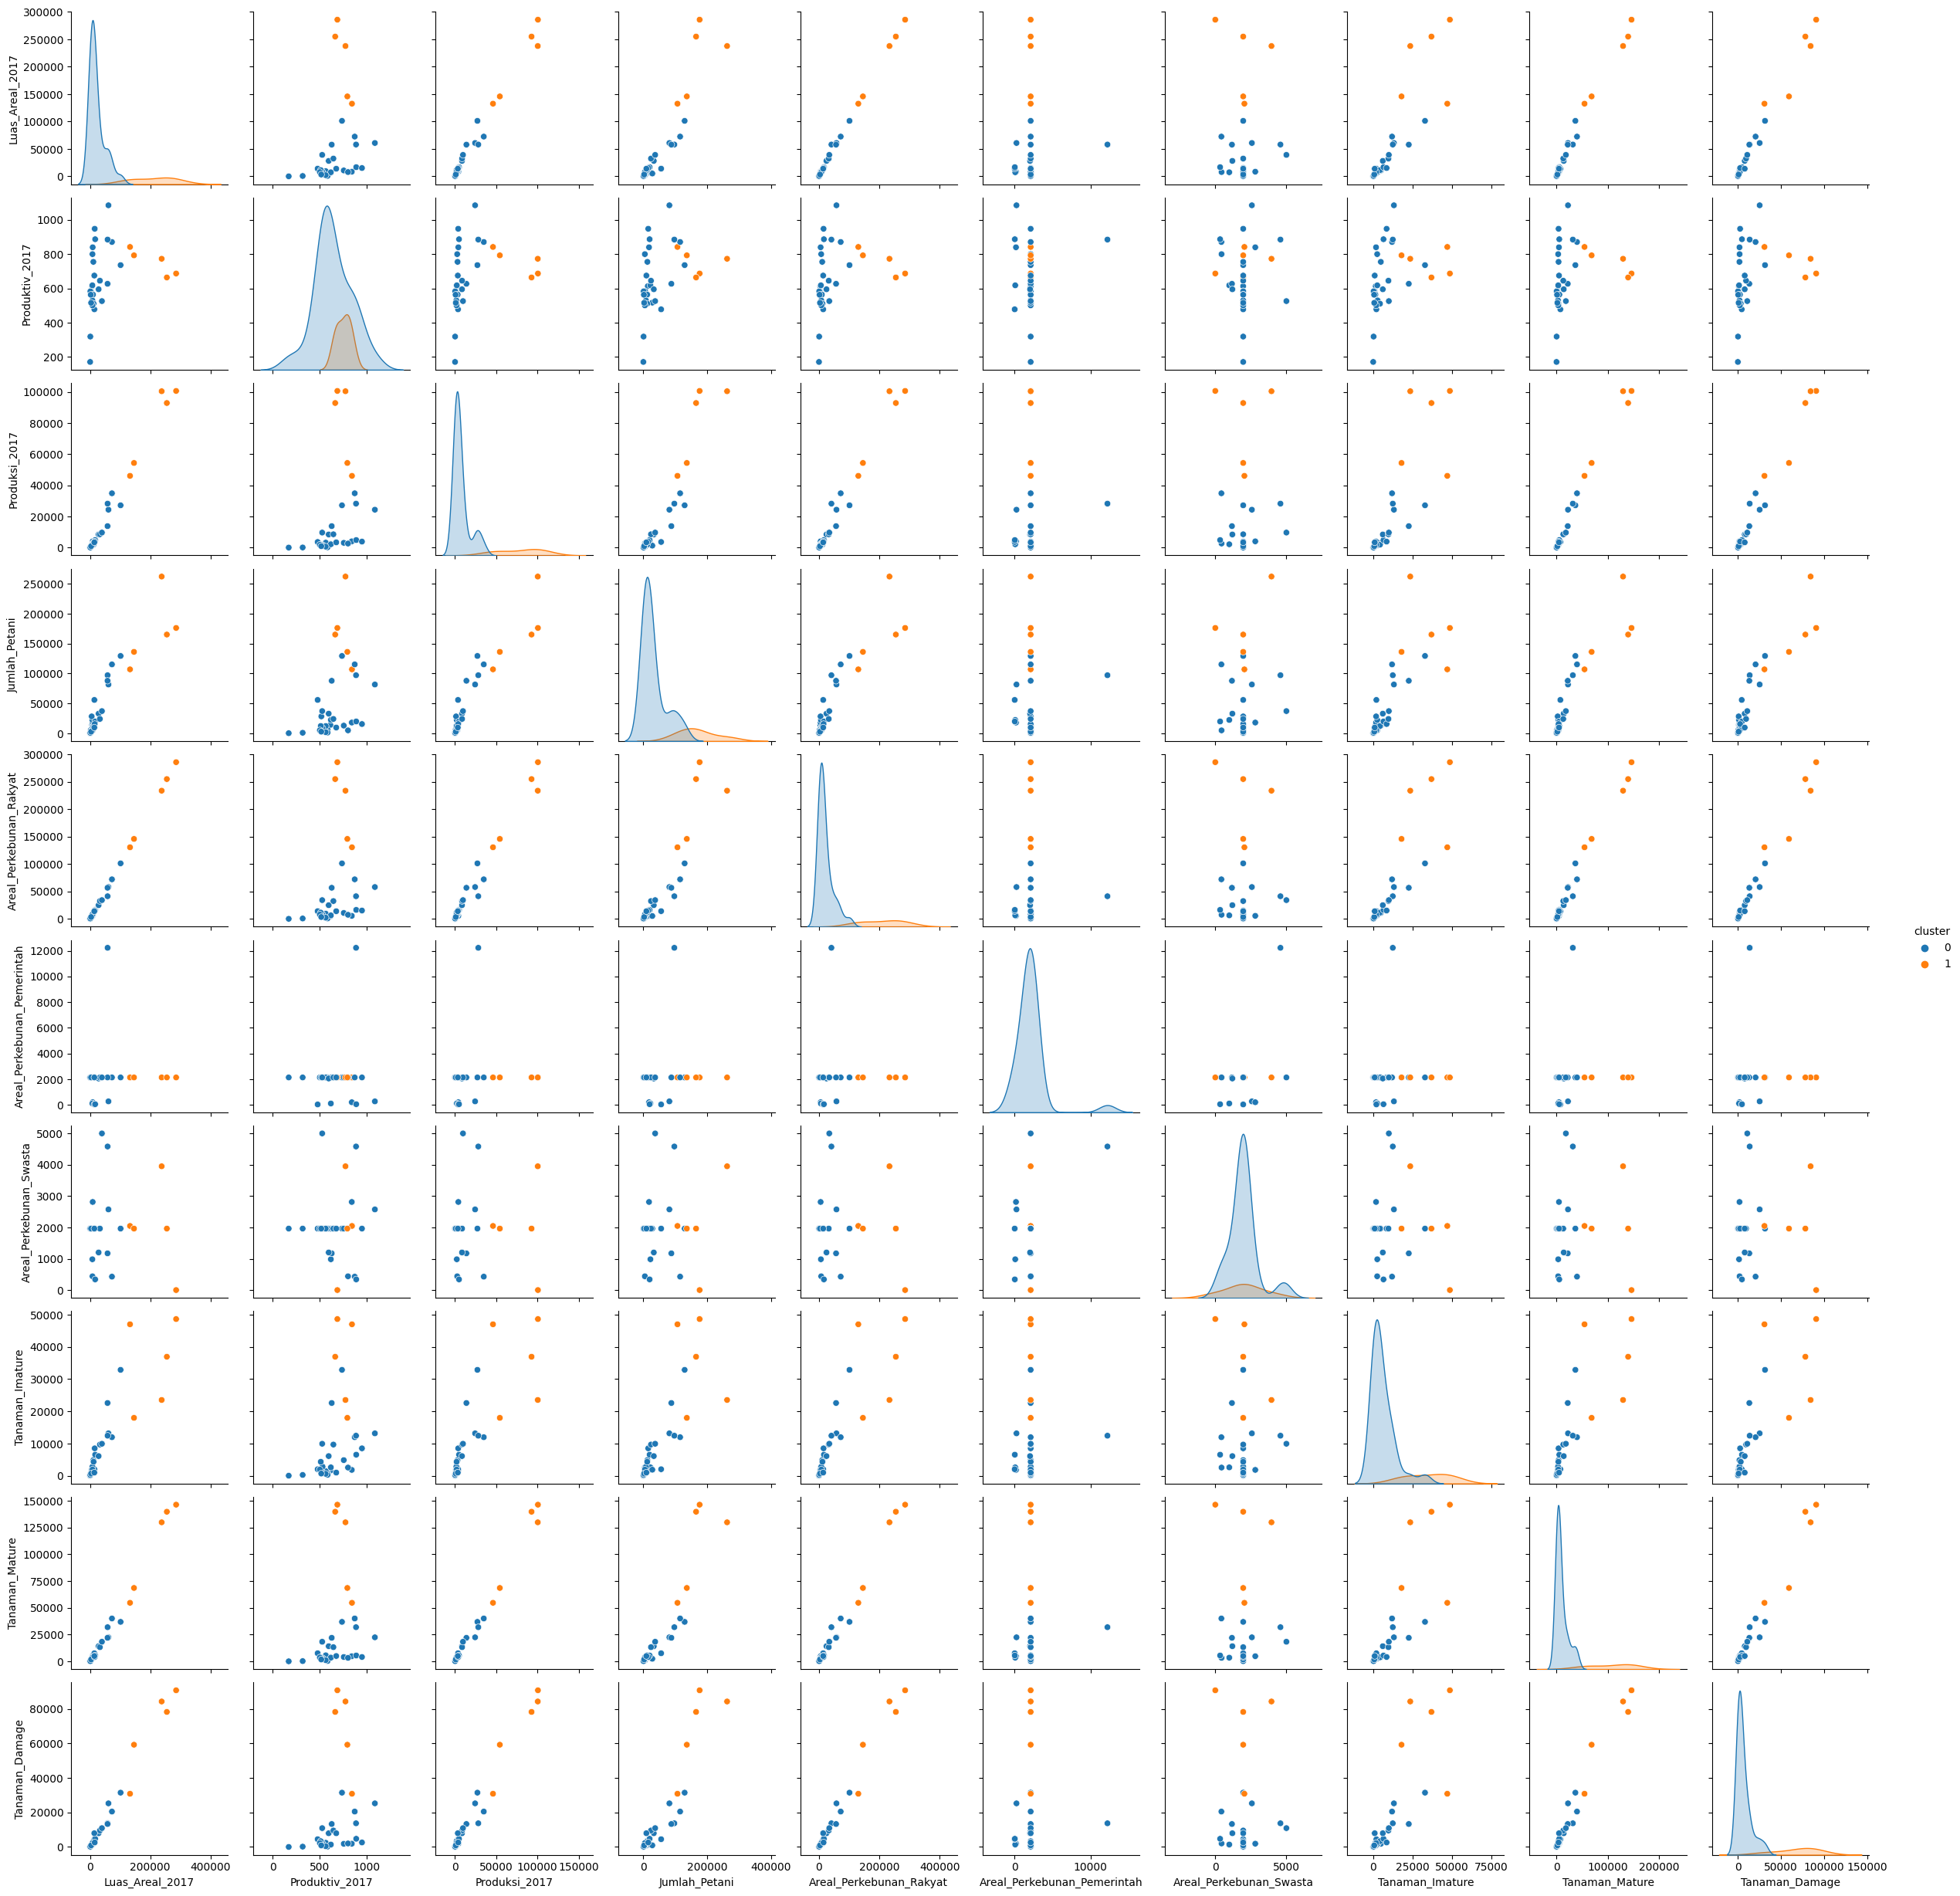

In [47]:
sns.pairplot(df, hue='cluster')

In [48]:
# tampilkan 5 data provinsi yang meililki Luas_Areal_2017 tinggi
df.sort_values(by=['Luas_Areal_2017'], ascending=False).head(5)

# ✅

,Luas_Areal_2017,Produktiv_2017,Produksi_2017,Jumlah_Petani,Areal_Perkebunan_Rakyat,Areal_Perkebunan_Pemerintah,Areal_Perkebunan_Swasta,Tanaman_Imature,Tanaman_Mature,Tanaman_Damage,cluster,Provinsi
26,285787,687,100590,176262,285784,2134,4,48633,146271,90883,1,Sulawesi Tengah
29,254957,664,92831,165214,254957,2134,1965,36939,139683,78335,1,Sulawesi Tenggara
27,237711,773,100391,262240,233760,2134,3952,23524,129797,84391,1,Sulawesi Selatan
28,145786,793,54332,136253,145787,2134,1965,17978,68504,59305,1,Sulawesi Barat
2,132557,842,46052,106990,130508,2134,2049,47005,54635,30867,1,Sumatera Barat


In [49]:
# tampilkan 5 data provinsi yang meililki Produktiv_2017 tinggi
df.sort_values(by=['Produktiv_2017'], ascending=False).head(5)

# ❌

,Luas_Areal_2017,Produktiv_2017,Produksi_2017,Jumlah_Petani,Areal_Perkebunan_Rakyat,Areal_Perkebunan_Pemerintah,Areal_Perkebunan_Swasta,Tanaman_Imature,Tanaman_Mature,Tanaman_Damage,cluster,Provinsi
1,60853,1085,24318,81661,58007,270,2576,13165,22406,25283,0,Sumatera Utara
25,15162,948,3837,15522,15162,2134,1965,8516,4047,2599,0,Gorontalo
24,16716,887,4821,19806,16323,50,344,6545,5433,4738,0,Sulawesi Utara
15,58019,885,28214,97167,41207,12229,4583,12441,31862,13717,0,Jawa Timur
9,72495,871,34856,115285,72063,2134,432,11968,40008,20525,0,Lampung


In [50]:
# tampilkan 5 data provinsi yang meililki Produksi_2017 tinggi
df.sort_values(by=['Produksi_2017'], ascending=False).head(5)

# ✅

,Luas_Areal_2017,Produktiv_2017,Produksi_2017,Jumlah_Petani,Areal_Perkebunan_Rakyat,Areal_Perkebunan_Pemerintah,Areal_Perkebunan_Swasta,Tanaman_Imature,Tanaman_Mature,Tanaman_Damage,cluster,Provinsi
26,285787,687,100590,176262,285784,2134,4,48633,146271,90883,1,Sulawesi Tengah
27,237711,773,100391,262240,233760,2134,3952,23524,129797,84391,1,Sulawesi Selatan
29,254957,664,92831,165214,254957,2134,1965,36939,139683,78335,1,Sulawesi Tenggara
28,145786,793,54332,136253,145787,2134,1965,17978,68504,59305,1,Sulawesi Barat
2,132557,842,46052,106990,130508,2134,2049,47005,54635,30867,1,Sumatera Barat


In [51]:
# tampilkan 5 data provinsi yang meililki Jumlah_Petani tinggi
df.sort_values(by=['Jumlah_Petani'], ascending=False).head(5)

# ❌

,Luas_Areal_2017,Produktiv_2017,Produksi_2017,Jumlah_Petani,Areal_Perkebunan_Rakyat,Areal_Perkebunan_Pemerintah,Areal_Perkebunan_Swasta,Tanaman_Imature,Tanaman_Mature,Tanaman_Damage,cluster,Provinsi
27,237711,773,100391,262240,233760,2134,3952,23524,129797,84391,1,Sulawesi Selatan
26,285787,687,100590,176262,285784,2134,4,48633,146271,90883,1,Sulawesi Tengah
29,254957,664,92831,165214,254957,2134,1965,36939,139683,78335,1,Sulawesi Tenggara
28,145786,793,54332,136253,145787,2134,1965,17978,68504,59305,1,Sulawesi Barat
0,101202,736,27129,129408,101203,2134,1965,32869,36835,31499,0,Aceh


In [52]:
# tampilkan 5 data provinsi yang meililki Areal_Perkebunan_Rakyat tinggi
df.sort_values(by=['Areal_Perkebunan_Rakyat'], ascending=False).head(5)

# ✅

,Luas_Areal_2017,Produktiv_2017,Produksi_2017,Jumlah_Petani,Areal_Perkebunan_Rakyat,Areal_Perkebunan_Pemerintah,Areal_Perkebunan_Swasta,Tanaman_Imature,Tanaman_Mature,Tanaman_Damage,cluster,Provinsi
26,285787,687,100590,176262,285784,2134,4,48633,146271,90883,1,Sulawesi Tengah
29,254957,664,92831,165214,254957,2134,1965,36939,139683,78335,1,Sulawesi Tenggara
27,237711,773,100391,262240,233760,2134,3952,23524,129797,84391,1,Sulawesi Selatan
28,145786,793,54332,136253,145787,2134,1965,17978,68504,59305,1,Sulawesi Barat
2,132557,842,46052,106990,130508,2134,2049,47005,54635,30867,1,Sumatera Barat


In [53]:
# tampilkan 5 data provinsi yang meililki Areal_Perkebunan_Pemerintah tinggi
df.sort_values(by=['Areal_Perkebunan_Pemerintah'], ascending=False).head(5)

# ❌

,Luas_Areal_2017,Produktiv_2017,Produksi_2017,Jumlah_Petani,Areal_Perkebunan_Rakyat,Areal_Perkebunan_Pemerintah,Areal_Perkebunan_Swasta,Tanaman_Imature,Tanaman_Mature,Tanaman_Damage,cluster,Provinsi
15,58019,885,28214,97167,41207,12229,4583,12441,31862,13717,0,Jawa Timur
0,101202,736,27129,129408,101203,2134,1965,32869,36835,31499,0,Aceh
18,57838,627,13762,87876,56663,2134,1175,22586,21949,13303,0,Nusa Tenggara Timur
32,39130,526,9630,37168,34130,2134,5000,9938,18274,10915,0,Papua
31,32436,645,8526,24049,32436,2134,1965,9690,13211,9536,0,Maluku Utara


In [54]:
# tampilkan 5 data provinsi yang meililki Areal_Perkebunan_Swasta tinggi
df.sort_values(by=['Areal_Perkebunan_Swasta'], ascending=False).head(5)

# ❌

,Luas_Areal_2017,Produktiv_2017,Produksi_2017,Jumlah_Petani,Areal_Perkebunan_Rakyat,Areal_Perkebunan_Pemerintah,Areal_Perkebunan_Swasta,Tanaman_Imature,Tanaman_Mature,Tanaman_Damage,cluster,Provinsi
32,39130,526,9630,37168,34130,2134,5000,9938,18274,10915,0,Papua
15,58019,885,28214,97167,41207,12229,4583,12441,31862,13717,0,Jawa Timur
27,237711,773,100391,262240,233760,2134,3952,23524,129797,84391,1,Sulawesi Selatan
11,8477,840,3994,17999,5461,203,2814,1829,4775,1894,0,Jawa Barat
1,60853,1085,24318,81661,58007,270,2576,13165,22406,25283,0,Sumatera Utara


In [55]:
# tampilkan 5 data provinsi yang meililki Tanaman_Imature tinggi
df.sort_values(by=['Tanaman_Imature'], ascending=False).head(5)

# ❌

,Luas_Areal_2017,Produktiv_2017,Produksi_2017,Jumlah_Petani,Areal_Perkebunan_Rakyat,Areal_Perkebunan_Pemerintah,Areal_Perkebunan_Swasta,Tanaman_Imature,Tanaman_Mature,Tanaman_Damage,cluster,Provinsi
26,285787,687,100590,176262,285784,2134,4,48633,146271,90883,1,Sulawesi Tengah
2,132557,842,46052,106990,130508,2134,2049,47005,54635,30867,1,Sumatera Barat
29,254957,664,92831,165214,254957,2134,1965,36939,139683,78335,1,Sulawesi Tenggara
0,101202,736,27129,129408,101203,2134,1965,32869,36835,31499,0,Aceh
27,237711,773,100391,262240,233760,2134,3952,23524,129797,84391,1,Sulawesi Selatan


In [56]:
# tampilkan 5 data provinsi yang meililki Tanaman_Mature tinggi
df.sort_values(by=['Tanaman_Mature'], ascending=False).head(5)

# ✅

,Luas_Areal_2017,Produktiv_2017,Produksi_2017,Jumlah_Petani,Areal_Perkebunan_Rakyat,Areal_Perkebunan_Pemerintah,Areal_Perkebunan_Swasta,Tanaman_Imature,Tanaman_Mature,Tanaman_Damage,cluster,Provinsi
26,285787,687,100590,176262,285784,2134,4,48633,146271,90883,1,Sulawesi Tengah
29,254957,664,92831,165214,254957,2134,1965,36939,139683,78335,1,Sulawesi Tenggara
27,237711,773,100391,262240,233760,2134,3952,23524,129797,84391,1,Sulawesi Selatan
28,145786,793,54332,136253,145787,2134,1965,17978,68504,59305,1,Sulawesi Barat
2,132557,842,46052,106990,130508,2134,2049,47005,54635,30867,1,Sumatera Barat


In [57]:
# tampilkan 5 data provinsi yang meililki Tanaman_Damage tinggi
df.sort_values(by=['Tanaman_Damage'], ascending=False).head(5)

# ❌

,Luas_Areal_2017,Produktiv_2017,Produksi_2017,Jumlah_Petani,Areal_Perkebunan_Rakyat,Areal_Perkebunan_Pemerintah,Areal_Perkebunan_Swasta,Tanaman_Imature,Tanaman_Mature,Tanaman_Damage,cluster,Provinsi
26,285787,687,100590,176262,285784,2134,4,48633,146271,90883,1,Sulawesi Tengah
27,237711,773,100391,262240,233760,2134,3952,23524,129797,84391,1,Sulawesi Selatan
29,254957,664,92831,165214,254957,2134,1965,36939,139683,78335,1,Sulawesi Tenggara
28,145786,793,54332,136253,145787,2134,1965,17978,68504,59305,1,Sulawesi Barat
0,101202,736,27129,129408,101203,2134,1965,32869,36835,31499,0,Aceh


Knowledge

In [58]:
# tampilkan 5 data provinsi yang meililki Tanaman_Mature tinggi dan Produksi_2017 tinggi
df.sort_values(by=['Luas_Areal_2017', 'Produksi_2017','Areal_Perkebunan_Rakyat','Tanaman_Mature'], ascending=False).head(5)

,Luas_Areal_2017,Produktiv_2017,Produksi_2017,Jumlah_Petani,Areal_Perkebunan_Rakyat,Areal_Perkebunan_Pemerintah,Areal_Perkebunan_Swasta,Tanaman_Imature,Tanaman_Mature,Tanaman_Damage,cluster,Provinsi
26,285787,687,100590,176262,285784,2134,4,48633,146271,90883,1,Sulawesi Tengah
29,254957,664,92831,165214,254957,2134,1965,36939,139683,78335,1,Sulawesi Tenggara
27,237711,773,100391,262240,233760,2134,3952,23524,129797,84391,1,Sulawesi Selatan
28,145786,793,54332,136253,145787,2134,1965,17978,68504,59305,1,Sulawesi Barat
2,132557,842,46052,106990,130508,2134,2049,47005,54635,30867,1,Sumatera Barat


In [59]:
#tampilkan data yang berada pada cluster 0
df[df['cluster']==0]

,Luas_Areal_2017,Produktiv_2017,Produksi_2017,Jumlah_Petani,Areal_Perkebunan_Rakyat,Areal_Perkebunan_Pemerintah,Areal_Perkebunan_Swasta,Tanaman_Imature,Tanaman_Mature,Tanaman_Damage,cluster,Provinsi
0,101202,736,27129,129408,101203,2134,1965,32869,36835,31499,0,Aceh
1,60853,1085,24318,81661,58007,270,2576,13165,22406,25283,0,Sumatera Utara
3,6534,613,2316,14033,4574,2134,1961,1611,3777,1146,0,Riau
4,37,171,0,204,37,2134,1965,30,5,3,0,Kepulauan Riau
5,2439,584,594,5725,2439,2134,1965,809,1016,614,0,Jambi
6,10716,755,3042,12875,10716,2134,1965,4860,4029,1828,0,Sumatera Selatan
7,764,583,177,1220,764,2134,1965,288,304,173,0,Kepulauan Bangka Belitung
8,9448,564,3166,12221,9448,2134,1965,1425,5609,2415,0,Bengkulu
9,72495,871,34856,115285,72063,2134,432,11968,40008,20525,0,Lampung
11,8477,840,3994,17999,5461,203,2814,1829,4775,1894,0,Jawa Barat


In [60]:
#tampilkan data yang berada pada cluster 1
df[df['cluster']==1]

,Luas_Areal_2017,Produktiv_2017,Produksi_2017,Jumlah_Petani,Areal_Perkebunan_Rakyat,Areal_Perkebunan_Pemerintah,Areal_Perkebunan_Swasta,Tanaman_Imature,Tanaman_Mature,Tanaman_Damage,cluster,Provinsi
2,132557,842,46052,106990,130508,2134,2049,47005,54635,30867,1,Sumatera Barat
26,285787,687,100590,176262,285784,2134,4,48633,146271,90883,1,Sulawesi Tengah
27,237711,773,100391,262240,233760,2134,3952,23524,129797,84391,1,Sulawesi Selatan
28,145786,793,54332,136253,145787,2134,1965,17978,68504,59305,1,Sulawesi Barat
29,254957,664,92831,165214,254957,2134,1965,36939,139683,78335,1,Sulawesi Tenggara


**Luas_Areal_2017**

**Areal_Perkebunan_Rakyat**

**Produksi_2017**

**Tanaman_Mature**




Dari visualisasi diatas dapat dilihat bahwa provinsi yang memiliki Luas_Areal_2017, Areal_Perkebunan_Rakyat, Produksi_2017, Tanaman_Mature yang tinggi akan masuk kedalam cluster 1 sedangkan diluar kriteria tersebut akan masuk kedalam cluster 0.

Jika ditelisik lebih jauh Provinsi yang masuk ke dalam cluster 1 adalah Provinsi yang memiliki kriteria Luas_Areal yang luas dengan komposisi Tanaman_Mature yang banyak sehingga produksi yang dihasilkan juga tinggi dari semua aspek yang ada Perkebunan_Rakyat sangat berperan penting bagi komoditas kakao di Provinsi tersebut sehingga Kementan selaku stakeholder terkait bisa memfokuskan program atau penyuluhan kepada para petani yang berada di perkebunan rakyat guna menjaga stabilitas produksi di provinsi tersebut.

Sedangkan untuk Provinsi yang masuk ke dalam cluster 0 adalah Provinsi yang memiliki kriteria Luas_Areal yang kecil dengan komposisi Tanaman_Mature yang sedikit sehingga produksi yang dihasilkan juga rendah dari sehingga Kementan selaku stakeholder terkait dapat memberikan program atau penyuluhan yang berbeda treatmennya untuk meningkatkan produksi komoditas kakao di provinsi tersebut.

Dari hasil analisis diatas dapat ditarik kesimpulan bahwa cluster 1 adalah provinsi yang memiliki komoditas kako yang baik sedangkan cluster 0 adalah provinsi yang memiliki komoditas kakao yang kurang baik dan provinsi yang berada di Cluster 1 masih tetap yang mengalami kenaikan cukup drastis terdapat pada provinsi Sumatera Barat dikarenakan Luas_Areal bertambah dan Tanaman_Mature ikut naik hal ini yang mendongkrak produksi pada provinsi tersebut.